### FNN

In [ ]:
# !pip install tensorflow datasets
from sklearn.datasets import load_iris #to load default dataset

In [117]:
datasets = load_iris()

* Data --> Feature metrix or multid-mensional-array
* Target --> labels # final_output

In [118]:
# 1st step input numbers
data = datasets.data
target = datasets.target

In [119]:
#2nd step Network
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [120]:
import pandas as pd
import numpy as np
np.unique(target)


array([0, 1, 2])

In [121]:
print(data[:5])
print(target[50:65])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [122]:
print(len(data))

150


In [123]:
from tensorflow.keras.layers import Dense # 2nd Step Network
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [124]:
#Creating model
model = Sequential ()
#1st hidden layer/dense layer/node 08
model.add(Dense(8, input_dim = 4, activation= "relu"))
#2nd hidden layer
model.add(Dense(8, input_dim = 8, activation= "relu"))
#final hidden layer/ node will be as same as total layer
model.add(Dense(3, input_dim=8, activation= "softmax")) #we use softmax when the layer is more than 2, for multi class

In [138]:
model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics=['accuracy']) #for smooth performance we use sgd optimizer

In [139]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [140]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size= 0.2, random_state =1)

In [141]:
from tensorflow.keras.utils import to_categorical #[0,1,2]

In [142]:
update_train_target = to_categorical(train_target)

In [143]:
print(update_train_target[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [144]:
history = model.fit(train_data, update_train_target, epochs =5)

Epoch 1/5
4/4 [==============================] - 1s 2ms/step - loss: 1.4882 - accuracy: 0.4167
Epoch 2/5
4/4 [==============================] - 0s 3ms/step - loss: 0.9578 - accuracy: 0.6917
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7619 - accuracy: 0.6917
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6917
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7000


In [145]:
import matplotlib.pyplot as plt

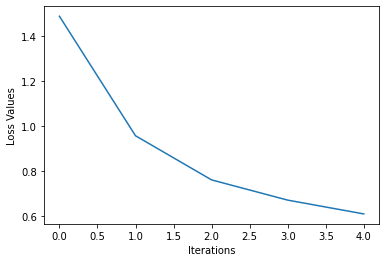

In [146]:
plt.plot(history.history["loss"])
plt.xlabel("Iterations")
plt.ylabel("Loss Values")
plt.show()

In [147]:
model.metrics_names

['loss', 'accuracy']

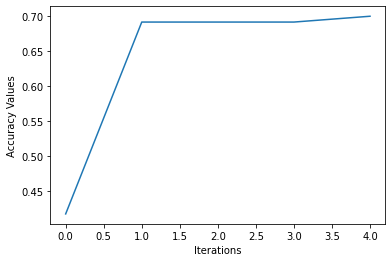

In [148]:
plt.plot(history.history["accuracy"])
plt.xlabel("Iterations")
plt.ylabel("Accuracy Values")
plt.show()

In [149]:
predicted_target = model.predict(test_data)

In [150]:
print(predicted_target)

[[0.7981353  0.18148762 0.02037705]
 [0.25436813 0.44211692 0.30351493]
 [0.16851732 0.42663634 0.40484637]
 [0.726453   0.23895815 0.03458876]
 [0.04961757 0.29197767 0.6584048 ]
 [0.10257437 0.36295193 0.53447366]
 [0.04990959 0.3294801  0.6206103 ]
 [0.6405966  0.2957802  0.06362306]
 [0.6868036  0.25684556 0.05635086]
 [0.0404947  0.28630847 0.67319685]
 [0.1291121  0.36763334 0.5032546 ]
 [0.70685124 0.25096422 0.04218449]
 [0.04379319 0.2942706  0.66193616]
 [0.13526851 0.39943296 0.4652985 ]
 [0.10628739 0.3608201  0.5328925 ]
 [0.69940954 0.24837026 0.05222018]
 [0.17546964 0.4067991  0.41773123]
 [0.08991616 0.32866058 0.5814232 ]
 [0.6909397  0.2633085  0.04575173]
 [0.73203754 0.22913691 0.03882555]
 [0.11740191 0.33934876 0.54324937]
 [0.08542145 0.31961802 0.5949605 ]
 [0.08587403 0.3530788  0.5610472 ]
 [0.7155563  0.24286945 0.04157426]
 [0.05754142 0.298495   0.6439636 ]
 [0.14723594 0.38843584 0.46432814]
 [0.7883383  0.1878715  0.02379012]
 [0.7255845  0.23500289 0.03

In [151]:
import numpy as np

In [152]:
print("Pred_labels: ", np.argmax(predicted_target, axis =1))
print("Actual_labels:", test_target)

Pred_labels:  [0 1 1 0 2 2 2 0 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 0 2 2 0 0 2 2]
Actual_labels: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


### CNN


In [46]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense,Activation, Flatten, Conv2D, MaxPool2D, AveragePooling2D, GlobalAveragePooling2D, ZeroPadding2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.preprocessing import image

In [47]:
(x_train, y_train), _ = cifar10.load_data()

170500096/170498071 [==============================] - 756s 4us/step


In [48]:
print(x_train[0].shape)
print(y_train[0].shape)

(32, 32, 3)
(1,)


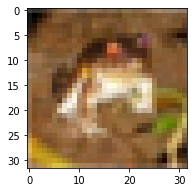

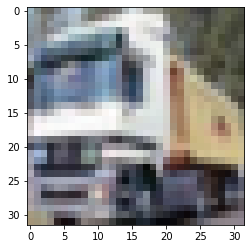

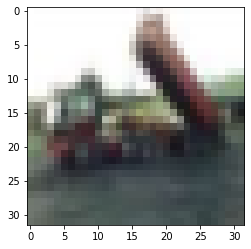

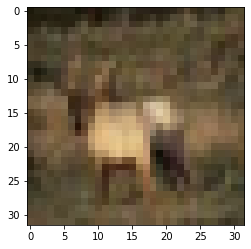

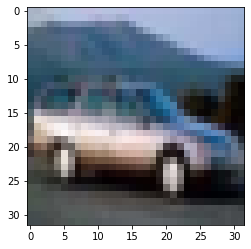

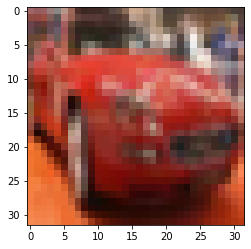

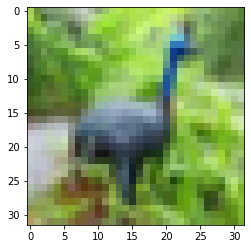

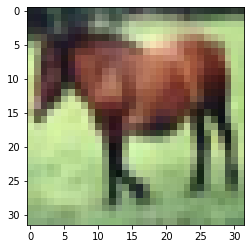

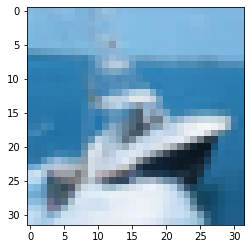

In [49]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.show()

In [50]:
(x_train, y_train), _ = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [51]:
print(x_train[0].shape)
print(y_train[0].shape)

(28, 28)
()


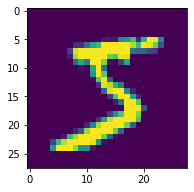

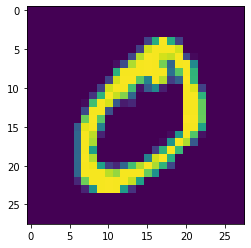

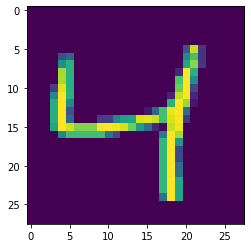

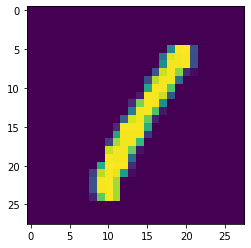

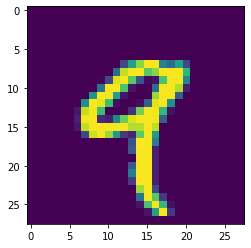

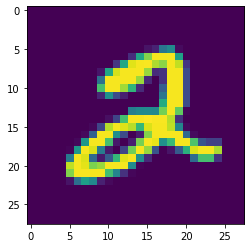

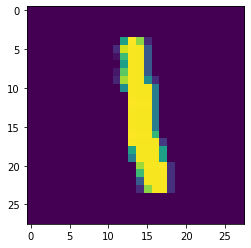

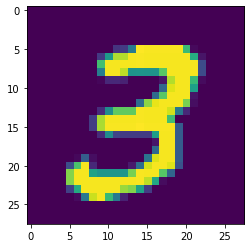

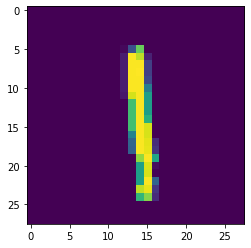

In [52]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.show()

### Padding
* Valid Padding --> No padding needded
* Same Paddding --> kernel size = 4, padding 4/2 ---> kernelsize/2### 

In [53]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3),
                filters = 10, kernel_size = (3, 3),
                strides = (1, 1), padding = "valid"))

In [54]:
print(model.output_shape)

(None, 8, 8, 10)


In [55]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3),
                filters = 10, kernel_size = (6, 6),
                strides = (1, 1), padding = "same"))

In [56]:
print(model.output_shape)

(None, 10, 10, 10)
